In [7]:
import pandas, numpy
import matplotlib.pyplot as matplt
import matplotlib
font = {'family' : 'Calibri',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [8]:
def DataLoading():
    df=pandas.read_csv("CSV_200223.csv")
    df=df.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9'],axis=1)
    dfcols=df.iloc[1].tolist()
    df=df.iloc[2:]
    df.columns='Date','ULSP_Price','ULSD_Price','ULSP_Duty','ULSD_Duty','ULSP_VAT','ULSD_VAT'
    df.to_csv("data.csv")
    df=pandas.read_csv("data.csv")
    df=df[['Date','ULSP_Price','ULSD_Price','ULSP_VAT','ULSD_VAT']]
    return df
price=DataLoading()
price.head()

,Date,ULSP_Price,ULSD_Price,ULSP_VAT,ULSD_VAT
0,09/06/2003,74.59,76.77,17.5,17.5
1,16/06/2003,74.47,76.69,17.5,17.5
2,23/06/2003,74.42,76.62,17.5,17.5
3,30/06/2003,74.35,76.51,17.5,17.5
4,07/07/2003,74.28,76.46,17.5,17.5


In [9]:
def CreateYear(df):
    al_dts=[]
    al_mnth=[]
    for d in price.Date:
        al_dts.append(d.split("/")[-1])
    df.insert(1,'Year',al_dts)
    return df
price1=CreateYear(price)
price1.head()

,Date,Year,ULSP_Price,ULSD_Price,ULSP_VAT,ULSD_VAT
0,09/06/2003,2003,74.59,76.77,17.5,17.5
1,16/06/2003,2003,74.47,76.69,17.5,17.5
2,23/06/2003,2003,74.42,76.62,17.5,17.5
3,30/06/2003,2003,74.35,76.51,17.5,17.5
4,07/07/2003,2003,74.28,76.46,17.5,17.5


In [10]:
def PriceAvg(df):
    allavg_ptr=[]
    allavg_dsl=[]
    vatavg_ptr=[]
    vatavg_dsl=[]
    yru=df.Year.unique()
    for y in yru:
        allavg_ptr.append(round(df[df['Year']==y]['ULSP_Price'].mean(),3))
        allavg_dsl.append(round(df[df['Year']==y]['ULSD_Price'].mean(),3))
        vatavg_ptr.append(round(df[df['Year']==y]['ULSP_VAT'].mean(),3))
        vatavg_dsl.append(round(df[df['Year']==y]['ULSD_VAT'].mean(),3))
    df1=pandas.DataFrame({
        "Year":yru,
        "Petrol Price":allavg_ptr,
        "Diesel Price":allavg_dsl,
        "Petrol VAT":vatavg_ptr,
        "Diesel VAT":vatavg_dsl,
    })
    return df1
price2=PriceAvg(price1)
price2

,Year,Petrol Price,Diesel Price,Petrol VAT,Diesel VAT
0,2003,75.592,77.288,17.500,17.500
1,2004,80.255,81.893,17.500,17.500
2,2005,86.797,90.820,17.500,17.500
3,2006,91.395,95.178,17.500,17.500
4,2007,94.495,97.112,17.500,17.500
5,2008,107.001,117.557,17.260,17.260
6,2009,99.594,104.150,15.000,15.000
7,2010,116.904,119.234,17.500,17.500
8,2011,133.413,138.805,19.952,19.952
9,2012,135.750,142.164,20.000,20.000


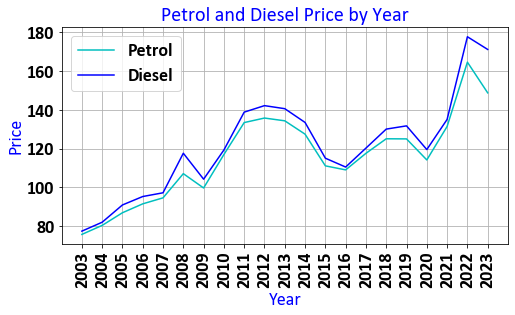

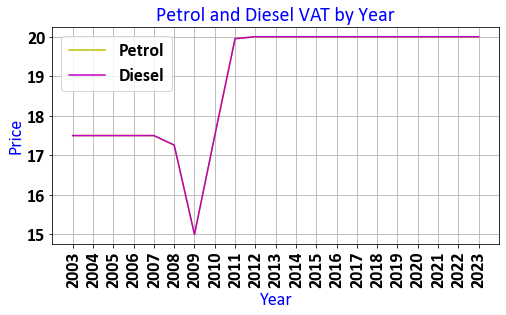

In [15]:
def PriceByYear(df):
    xt=[i for i in range(len(df['Year']))]
    matplt.figure(figsize=(8,4))
    matplt.title("Petrol and Diesel Price by Year",fontsize=20,color="b")
    matplt.plot(df['Petrol Price'],label='Petrol',color="c")
    matplt.plot(df['Diesel Price'],label='Diesel',color="b")
    matplt.xlabel("Year",fontsize=18,color="b")
    matplt.xticks(xt,df['Year'],rotation=90)
    matplt.ylabel("Price",fontsize=18,color="b")
    matplt.legend(loc='best')
    matplt.grid()
    matplt.show()
    
    matplt.figure(figsize=(8,4))
    matplt.title("Petrol and Diesel VAT by Year",fontsize=20,color="b")
    matplt.plot(df['Petrol VAT'],label='Petrol',color="y")
    matplt.plot(df['Diesel VAT'],label='Diesel',color="m")
    matplt.xlabel("Year",fontsize=18,color="b")
    matplt.xticks(xt,df['Year'],rotation=90)
    matplt.ylabel("Price",fontsize=18,color="b")
    matplt.legend(loc='best')
    matplt.grid()
    matplt.show()
PriceByYear(price2)

In [16]:
def FiveYrAvg(df,col,gcl,gcl1):
    df1=df[['Year',col]]
    df1_1_val=df1.iloc[:5][col].mean()
    yrs1_1=df1.iloc[:5]['Year'][0]+"-"+df1.iloc[:5]['Year'][4]
    
    df1_2_val=df1.iloc[5:10][col].mean()
    yrs1_2=df1.iloc[5:10]['Year'][5]+"-"+df1.iloc[5:10]['Year'][9]
    
    df1_3_val=df1.iloc[10:15][col].mean()
    yrs1_3=df1.iloc[10:15]['Year'][10]+"-"+df1.iloc[10:15]['Year'][14]
    
    df1_4_val=df1.iloc[15:20][col].mean()
    yrs1_4=df1.iloc[15:20]['Year'][15]+"-"+df1.iloc[15:20]['Year'][19]
    
    df1_5_val=df1.iloc[20:][col].mean()
    yrs1_5=df1.iloc[20:]['Year'][20]
    
    allvl=[df1_1_val,df1_2_val,df1_3_val,df1_4_val,df1_5_val]
    yrs=[yrs1_1,yrs1_2,yrs1_3,yrs1_4,yrs1_5]
    
    matplt.figure(figsize=(8,4))
    matplt.title("Five Year Average {}".format(col),fontsize=20,color="b")
    matplt.bar(yrs,allvl,alpha=0.5,color="{}".format(gcl))
    matplt.plot(allvl,"*--{}".format(gcl1))
    matplt.xlabel("{}".format(col),fontsize=18,color="b")
    matplt.ylabel("Price",fontsize=18,color="b")
    matplt.xticks(rotation=90)
    matplt.grid()
    matplt.show()


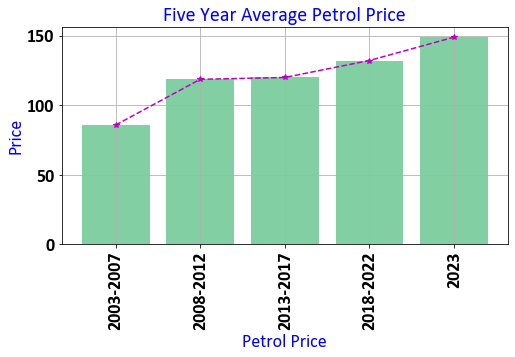

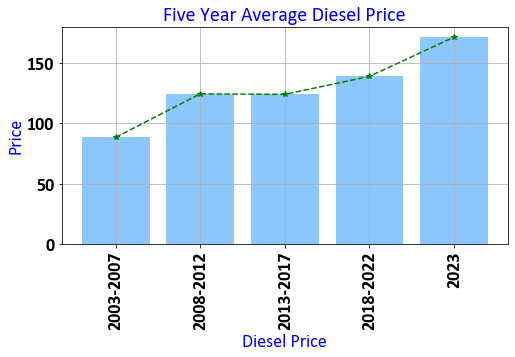

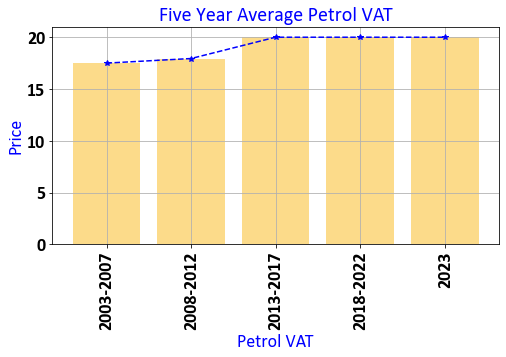

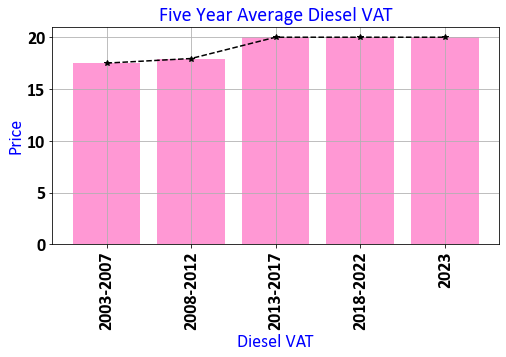

In [17]:
FiveYrAvg(price2,"Petrol Price","#08A04B","m")
FiveYrAvg(price2,"Diesel Price","#1E90FF","g")

FiveYrAvg(price2,"Petrol VAT","#FBB917","b")
FiveYrAvg(price2,"Diesel VAT","#FF33AA","k")

In [18]:
def OverallPrc(df):
    fets = [df['Petrol Price'], df['Diesel Price']]
    fig, ax = matplt.subplots(figsize=(8,4))
    ax.set_title("Overall Price of Petrol and Diesel",fontsize=20,color="b")
    box = ax.boxplot(fets, notch=True, patch_artist=True)
    matplt.xticks([1, 2], ['Petrol','Diesel'])
    colors = ['#FFFF33', '#FF8674']
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)
    matplt.xlabel("Oil",fontsize=18,color="b")
    matplt.ylabel("Price",fontsize=18,color="b")
    matplt.grid()
    matplt.show()

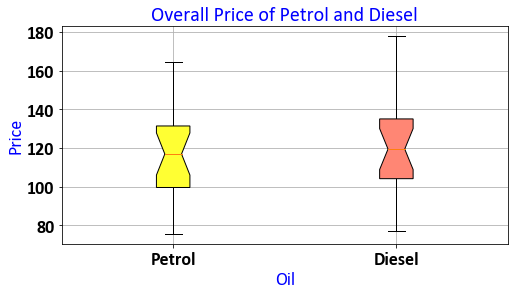

In [19]:
OverallPrc(price2)